### IMPORTING LIBS

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

### READING THE DATA 

In [96]:
df = pd.read_csv('AB_NYC_2019.csv')

### UNDERSTANDING THE DATA

In [97]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [98]:
df.shape

(48895, 16)

In [99]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### MISSING VALUES

In [101]:
df.isna().sum().sort_values(ascending=False)/len(df)*100

last_review                       20.558339
reviews_per_month                 20.558339
host_name                          0.042949
name                               0.032723
id                                 0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [102]:
df.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

#### REPLACING MISSING VALUES IN REVIEWS PER MONTH WITH THE MEAN VAL

In [103]:
mean_value = df.reviews_per_month.mean()

In [104]:
df.reviews_per_month.fillna(value=mean_value, inplace=True)

In [105]:
df.isna().sum().sort_values(ascending=False)/len(df)*100

last_review                       20.558339
host_name                          0.042949
name                               0.032723
id                                 0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

### CHANGING STR TO DATE

In [106]:
df.last_review.describe()

count          38843
unique          1764
top       23-06-2019
freq            1413
Name: last_review, dtype: object

In [107]:
df['last_review']= pd.to_datetime(df['last_review'])

In [110]:
df.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-05-07
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [111]:
df.last_review.fillna(value="unavaliable", inplace=True)

In [126]:
df.isna().sum().sort_values(ascending=False)/len(df)*100

host_name                         0.042949
name                              0.032723
id                                0.000000
minimum_nights                    0.000000
min_nights_capped                 0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
reviews_per_month                 0.000000
last_review                       0.000000
number_of_reviews                 0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price_capped                      0.000000
dtype: float64

### HANDLING OUTLIERS

### OUTLIERS IN MINIMUM NIGHTS

In [112]:
df.minimum_nights

0         1
1         1
2         3
3         1
4        10
         ..
48890     2
48891     4
48892    10
48893     1
48894     7
Name: minimum_nights, Length: 48895, dtype: int64

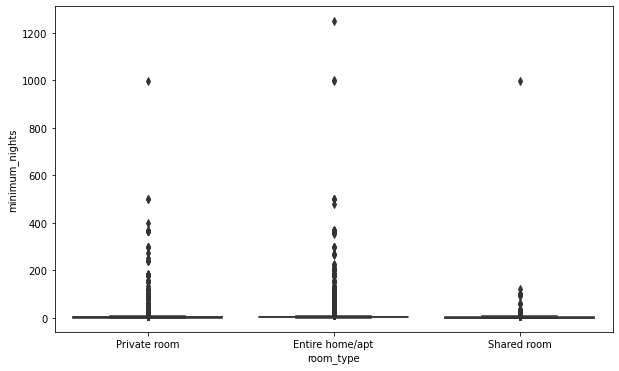

In [113]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, x='room_type',y='minimum_nights',palette='plasma')

We can see that there are a few outliers in the minimum_nights wrt room type

In [114]:
lower_limit = df["minimum_nights"].quantile(0.01)  
upper_limit = df["minimum_nights"].quantile(0.99)

print(lower_limit)
print(upper_limit)

1.0
45.0


In [115]:
df["min_nights_capped"] = np.where(df["minimum_nights"]> upper_limit, upper_limit,
                        np.where(df["minimum_nights"]< lower_limit, lower_limit,
                        df["minimum_nights"]))

In [116]:
df.min_nights_capped

0         1.0
1         1.0
2         3.0
3         1.0
4        10.0
         ... 
48890     2.0
48891     4.0
48892    10.0
48893     1.0
48894     7.0
Name: min_nights_capped, Length: 48895, dtype: float64

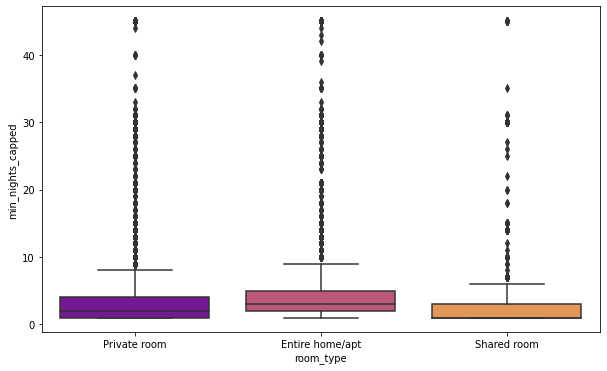

In [117]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, x='room_type',y='min_nights_capped',palette='plasma')

<AxesSubplot:xlabel='min_nights_capped', ylabel='price'>

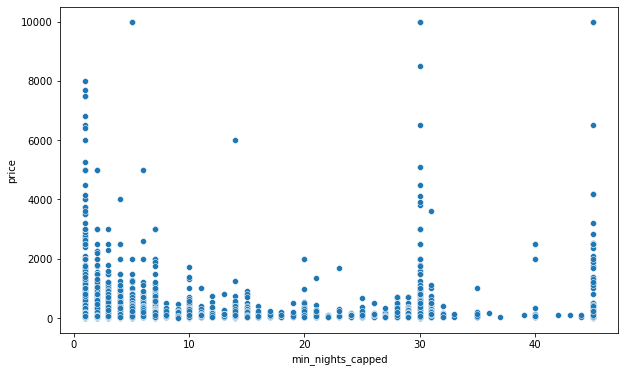

In [118]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="min_nights_capped",y="price")

In [119]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,min_nights_capped
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00,0.210000,6,365,1.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.380000,2,355,1.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,unavaliable,1.373221,1,365,3.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07 00:00:00,4.640000,1,194,1.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.100000,1,0,10.0


### OUTLIERS IN PRICE

In [120]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

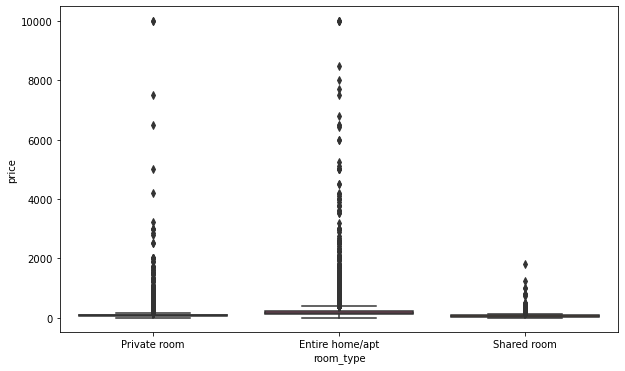

In [121]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, x='room_type',y='price',palette='plasma')

In [122]:
lower_limit = df["price"].quantile(0.01)  
upper_limit = df["price"].quantile(0.99)

print(lower_limit)
print(upper_limit)

30.0
799.0


In [123]:
df["price_capped"] = np.where(df["price"]> upper_limit, upper_limit,
                        np.where(df["price"]< lower_limit, lower_limit,
                        df["price"]))

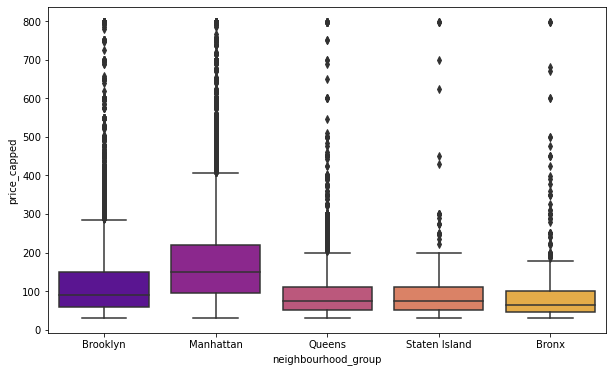

In [124]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='price_capped',palette='plasma')

In [125]:
df.availability_365.describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64